In [305]:
%pylab inline
import torch
import hw4_utils


def k_means(X=None, init_c=None, n_iters=50):
    """K-Means.

    Argument:
        X: 2D data points, shape [2, N].
        init_c: initial centroids, shape [2, 2]. Each column is a centroid.
    
    Return:
        c: shape [2, 2]. Each column is a centroid.
    """

    if X is None:
        X, init_c = hw4_utils.load_data()
        
    c = init_c
    cc = []
    for counter in range(n_iters):       
        
        c_prev = c.clone()
        n1 = 0
        n2 = 0
        temp = torch.zeros(init_c.shape)
        
        for i in range(X.shape[1]):
           
            if torch.norm((X[:,i] - c_prev[:,0])) < torch.norm((X[:,i] - c_prev[:,1])):
                temp[:,0] += X[:,i]
                n1 += 1
            else:
                temp[:,1] += X[:,i]
                n2 += 1 
        
        if n1 ==0:
            c[:,0] = c_prev[:,0]
        if n2 ==0:
            c[:,1] = c_prev[:,1]
        if n1!=0:
            c[:,0] = temp[:,0]/n1
        if n2!=0:
            c[:,1] = temp[:,1]/n2
        
        
        print(counter,c)
        
        cc += [c.clone()]
        
        if (torch.norm(c-c_prev)==0):
            break
        
    return c,cc


Populating the interactive namespace from numpy and matplotlib


In [306]:
x,y = k_means()

0 tensor([[ 0.2911, -0.5545],
        [ 0.1694, -0.0518]])
1 tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])
2 tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])


In [352]:
X, init_c = hw4_utils.load_data()


In [353]:
x1

array([[ 1.237202 ,  1.6248841,  1.6730095,  1.1952577,  2.432846 ,
         2.122202 ,  1.6685443,  2.403654 ,  2.2195709,  2.5856004],
       [-1.1162863, -2.0476809, -1.9694223, -2.3088722, -2.399035 ,
        -2.0658116, -2.39922  , -1.8321347, -1.8623333, -1.1418487]],
      dtype=float32)

[None]

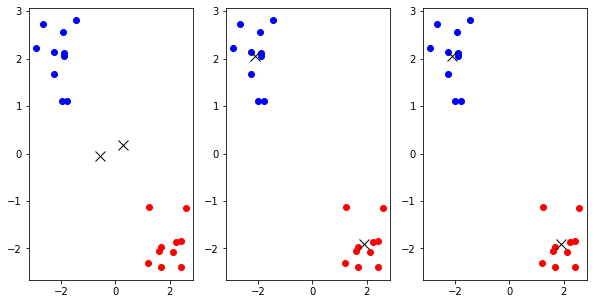

In [359]:
figure(figsize=(10,5))
subplot(1,3,1)
x1,x2 = [],[]
for i in range(X.shape[1]):

    if torch.norm((X[:,i] - y[0][:,0])) < torch.norm((X[:,i] - y[0][:,1])):
        x1+=[X[:,i].numpy()]
    else:
        x2 +=[X[:,i].numpy()]
c1 = y[0][:,0].reshape(-1,1)
c2 = y[0][:,1].reshape(-1,1)
x1 = array(x1).T
x2 = np.array(x2).T
c = torch.cat((c1, c2), dim=1)

plt.plot(x1[0, :], x1[1, :], "ro")
plt.plot(x2[0, :], x2[1, :], "bo")
l = plt.plot(c[0, :], c[1, :], "kx")
plt.setp(l, markersize=10)
#plt.show()

subplot(1,3,2)
x1,x2 = [],[]
for i in range(X.shape[1]):

    if torch.norm((X[:,i] - y[1][:,0])) < torch.norm((X[:,i] - y[1][:,1])):
        x1+=[X[:,i].numpy()]
    else:
        x2 +=[X[:,i].numpy()]
c1 = y[1][:,0].reshape(-1,1)
c2 = y[1][:,1].reshape(-1,1)
x1 = array(x1).T
x2 = np.array(x2).T
c = torch.cat((c1, c2), dim=1)

plt.plot(x1[0, :], x1[1, :], "ro")
plt.plot(x2[0, :], x2[1, :], "bo")
l = plt.plot(c[0, :], c[1, :], "kx")
plt.setp(l, markersize=10)
#plt.show()

subplot(1,3,3)
x1,x2 = [],[]
for i in range(X.shape[1]):

    if torch.norm((X[:,i] - y[2][:,0])) < torch.norm((X[:,i] - y[2][:,1])):
        x1+=[X[:,i].numpy()]
    else:
        x2 +=[X[:,i].numpy()]
c1 = y[2][:,0].reshape(-1,1)
c2 = y[2][:,1].reshape(-1,1)
x1 = array(x1).T
x2 = np.array(x2).T
c = torch.cat((c1, c2), dim=1)

plt.plot(x1[0, :], x1[1, :], "ro")
plt.plot(x2[0, :], x2[1, :], "bo")
l = plt.plot(c[0, :], c[1, :], "kx")
plt.setp(l, markersize=10)
#plt.show()


In [360]:
x1,x2 = [],[]
d = 0
for i in range(X.shape[1]):

    if torch.norm((X[:,i] - y[2][:,0])) < torch.norm((X[:,i] - y[2][:,1])):
        d += torch.norm((X[:,i] - y[2][:,0]))**2
    else:
        d +=torch.norm((X[:,i] - y[2][:,1]))**2

In [363]:
d/2

tensor(4.5600)

In [362]:
sqrt(d)

tensor(3.0199)

In [365]:
y[2]

tensor([[ 1.9163, -2.0952],
        [-1.9143,  2.0540]])

In [366]:
y[0]

tensor([[ 0.2911, -0.5545],
        [ 0.1694, -0.0518]])